Example plots
=============

These examples are mostly taken from the blog post ["How to Create Professional and Readable Scientific Plots in Python"](https://medium.com/@FilipeBorgesBR/how-to-create-professional-and-readable-scientific-plots-in-python-72f1defed8b3) and the [Python Graph Gallery](https://python-graph-gallery.com/). The idea is to practice customizing some basic plots so that you can later apply the principles to your own plots.

Line plot / timeseries
----------------------

### Basic plot

Here's a basic plot of noisy sine + cosine waves:

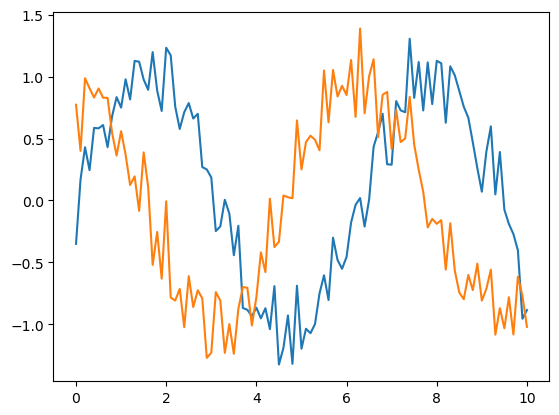

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Generate an array of x values from 0 to 10 with a step of 0.1
x = np.arange(0, 10.1, 0.1)

# Compute the sine and cosine values for each x
y1 = np.sin(x)
y2 = np.cos(x)

# Add random noise
np.random.seed(100)
noise_amplitude = 0.2
y1_noisy = y1 + noise_amplitude * np.random.randn(len(y1))
y2_noisy = y2 + noise_amplitude * np.random.randn(len(y2))

# Create a new figure for the plot
plt.figure()

# Plot the sine and cosine curves
plt.plot(x, y1_noisy)
plt.plot(x, y2_noisy)

# Show the figure
plt.show()

How might we improve this plot?

### Customized

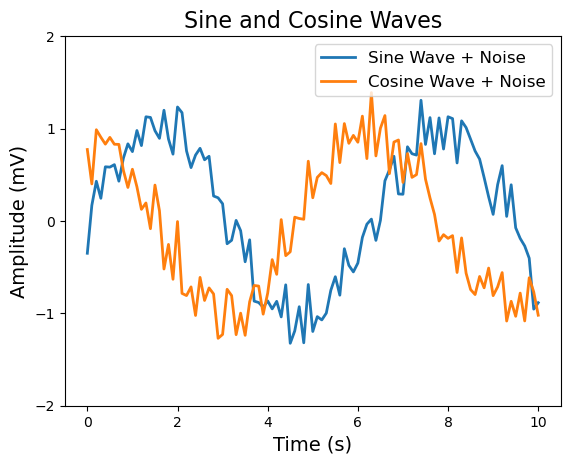

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Generate an array of x values from 0 to 10 with a step of 0.1
x = np.arange(0, 10.1, 0.1)

# Compute the sine and cosine values for each x
y1 = np.sin(x)
y2 = np.cos(x)

# Add random noise
np.random.seed(100)
noise_amplitude = 0.2
y1_noisy = y1 + noise_amplitude * np.random.randn(len(y1))
y2_noisy = y2 + noise_amplitude * np.random.randn(len(y2))

# Create a new figure for the plot
plt.figure()

# Plot the sine and cosine curves with labels for the legend
plt.plot(x, y1_noisy, "-", linewidth=2, label="Sine Wave + Noise")
plt.plot(x, y2_noisy, "-", linewidth=2, label="Cosine Wave + Noise")

# Set the plot title and axis labels with larger fonts for better readability
plt.title("Sine and Cosine Waves", fontsize=16)
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Amplitude (mV)", fontsize=14)

# Symmetric Y-axis for balanced visual perception
plt.ylim([-2, 2])
plt.yticks(np.arange(-2, 2.1, 1))

# Add legend
plt.legend(loc="upper right", fontsize=12)

# Show the figure
plt.show()

How could this plot be further improved?

Scatterplot
-----------

### Basic

Here's a basic scatterplot showing two variables from the [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset:

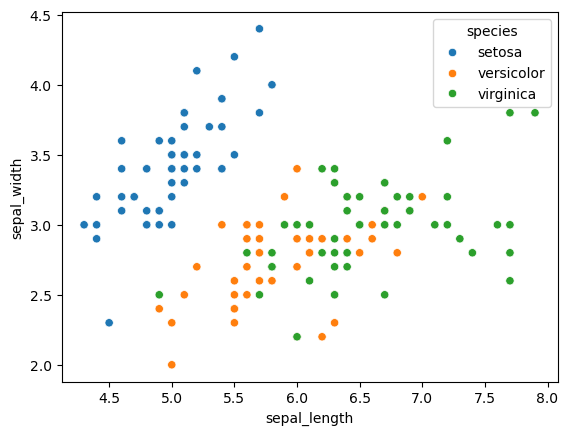

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

# Load the 'Iris' dataset
iris = sns.load_dataset('iris')

# Use the 'hue' argument to provide a factor variable
sns.scatterplot(
   x="sepal_length",
   y="sepal_width",
   data=iris,
   hue='species',
)

plt.show()

How might we improve this plot?

### Customized

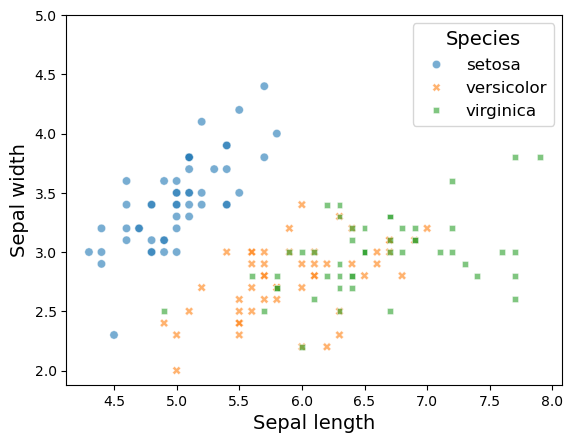

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

# Load the 'Iris' dataset
iris = sns.load_dataset('iris')

# Use the 'hue' argument to provide a factor variable
ax = sns.scatterplot(
   x="sepal_length",
   y="sepal_width",
   data=iris,
   hue='species',
   style='species',
   alpha=0.6
)

ax.set_ylim(None, 5)

ax.set_xlabel("Sepal length", fontsize=14)
ax.set_ylabel("Sepal width", fontsize=14)

plt.legend(title="Species", title_fontsize=14, fontsize=12)

plt.show()

How could this plot be further improved?

Map (geospatial data)
---------------------

### Basic

Here's a basic map of [GHCN CAMS](https://psl.noaa.gov/data/gridded/data.ghcncams.html) long-term (1991-2020) monthly mean 2m air temperature for July:

/Users/houghi/micromamba/envs/gc-analyses/lib/python3.12/site-packages/xarray/coding/times.py:1133: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/houghi/micromamba/envs/gc-analyses/lib/python3.12/site-packages/xarray/core/indexing.py:509: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype, copy=copy)


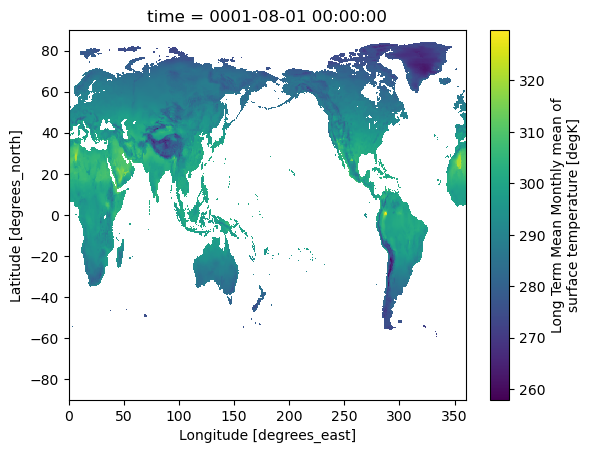

In [5]:
from matplotlib import pyplot as plt
import xarray as xr

t2m = xr.open_dataset(
    "http://psl.noaa.gov/thredds/dodsC/Datasets/ghcncams/Derived/air.mon.ltm.1991-2020.nc"
)
t2m["air"].isel(time=7).plot()

How might we improve this plot?

### Customized

/Users/houghi/micromamba/envs/gc-analyses/lib/python3.12/site-packages/xarray/coding/times.py:1133: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/houghi/micromamba/envs/gc-analyses/lib/python3.12/site-packages/xarray/core/indexing.py:509: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype, copy=copy)


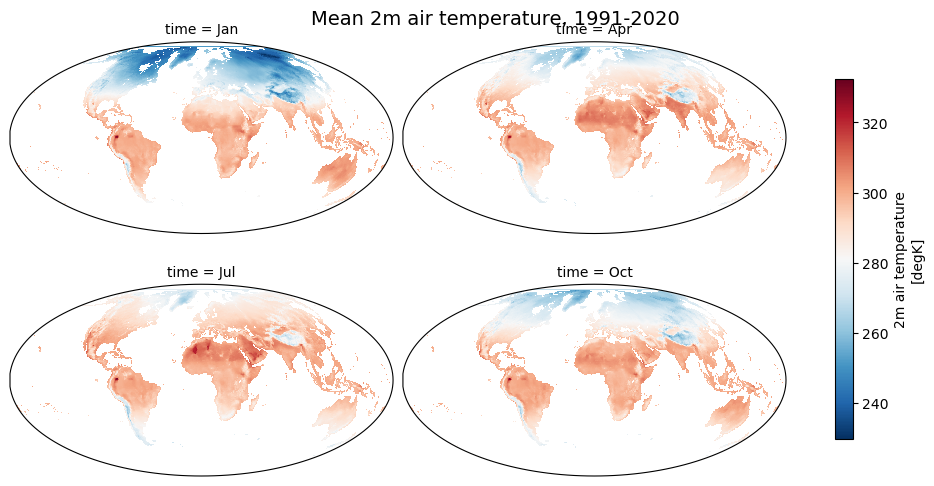

In [6]:
from cartopy import crs as ccrs
from matplotlib import pyplot as plt
import xarray as xr

t2m = xr.open_dataset(
    "http://psl.noaa.gov/thredds/dodsC/Datasets/ghcncams/Derived/air.mon.ltm.1991-2020.nc"
)

t2m["air"].isel(time=[1, 4, 7, 9]).assign_coords(time=["Jan", "Apr", "Jul", "Oct"]).plot(
    col="time",
    col_wrap=2,
    cmap="RdBu_r",
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "2m air temperature\n[degK]", "shrink": 0.8},
    figsize=(10, 5),
    subplot_kws={"projection": ccrs.Hammer()},
)

plt.suptitle("Mean 2m air temperature, 1991-2020", fontsize=14)
plt.show()

How could this plot be further improved?